In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [95]:
# Hyper-parameters

input_size = 1
output_size = 1
num_epochs = 100
learning_rate = 0.001

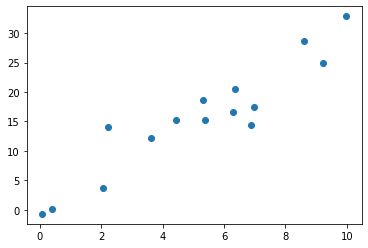

In [96]:
# Engineered Dataset

x_train = np.random.uniform(size=15, low=0, high=10).astype('float32')
y_train = ((np.random.normal(size=15) * 3) + (x_train * 3)).astype('float32')
plt.scatter(x_train, y_train)

In [97]:
# Linear regression model (lol)

lin_reg = nn.Linear(input_size, output_size)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(lin_reg.parameters(), lr=learning_rate)

In [98]:
# Train the model
for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs = torch.from_numpy(x_train).view([-1,1])
    targets = torch.from_numpy(y_train).view([-1,1])

    # Forward pass
    outputs = lin_reg(inputs)
    loss = criterion(outputs, targets)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 5 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

Epoch [5/100], Loss: 307.5209
Epoch [10/100], Loss: 150.0815
Epoch [15/100], Loss: 76.1490
Epoch [20/100], Loss: 41.4307
Epoch [25/100], Loss: 25.1269
Epoch [30/100], Loss: 17.4705
Epoch [35/100], Loss: 13.8748
Epoch [40/100], Loss: 12.1859
Epoch [45/100], Loss: 11.3925
Epoch [50/100], Loss: 11.0196
Epoch [55/100], Loss: 10.8442
Epoch [60/100], Loss: 10.7615
Epoch [65/100], Loss: 10.7223
Epoch [70/100], Loss: 10.7036
Epoch [75/100], Loss: 10.6945
Epoch [80/100], Loss: 10.6899
Epoch [85/100], Loss: 10.6874
Epoch [90/100], Loss: 10.6859
Epoch [95/100], Loss: 10.6849
Epoch [100/100], Loss: 10.6841


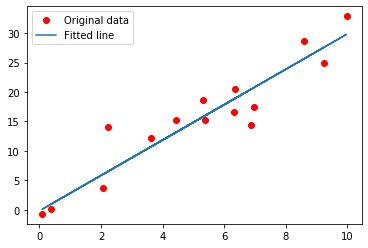

In [99]:
# Plot predictions
predicted = lin_reg(torch.from_numpy(x_train).view([-1,1])).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()